In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

import matplotlib.pyplot as plt

# Introduction
---
For today's tutorial, I will show the demos of tree-base methods.
While taking this tutorial, you can run this notebook step by step.
I will use the python package called *scikit-learn* for models and *pandas* for feature visualization.

---

# Decision Tree

---
In this section, I will show the demo of Decision Tree (DT) to classify the hand-written digits.

---

## Table of Contents
- Data Preparation
- Data Visualization
- Sample Codes
    - Single Tree
    - Bagging Classification
    - Random Forest
- Feature Importance

---

## References
- [Logistic Regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)
- [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
- [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)
- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
---

## Data Preparation
---

In this demo, I will use the same dataset as the previous tutorial, MNIST.
This includes the hand-written digits and mostly used for classification.

---

In [2]:
mnist = fetch_openml("mnist_784", data_home="mnist/")
data_num = 3000
X = mnist.data.values[:data_num]/255
y = np.array(mnist.target.values[:data_num], dtype=np.int)

In [3]:
classes = np.sort(pd.unique(y))
n_samples = X.shape[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

print(f"# of training data : {len(y_train)}")
print(f"# of test data     : {len(y_test)}")

# of training data : 2400
# of test data     : 600


## Data Visualization
---
Since data is originally represented as 2d image, we can visualize it with the reshaping function.
Since some codes are unique to python (numpy) programming, you do not need to obsess with this cell.

---

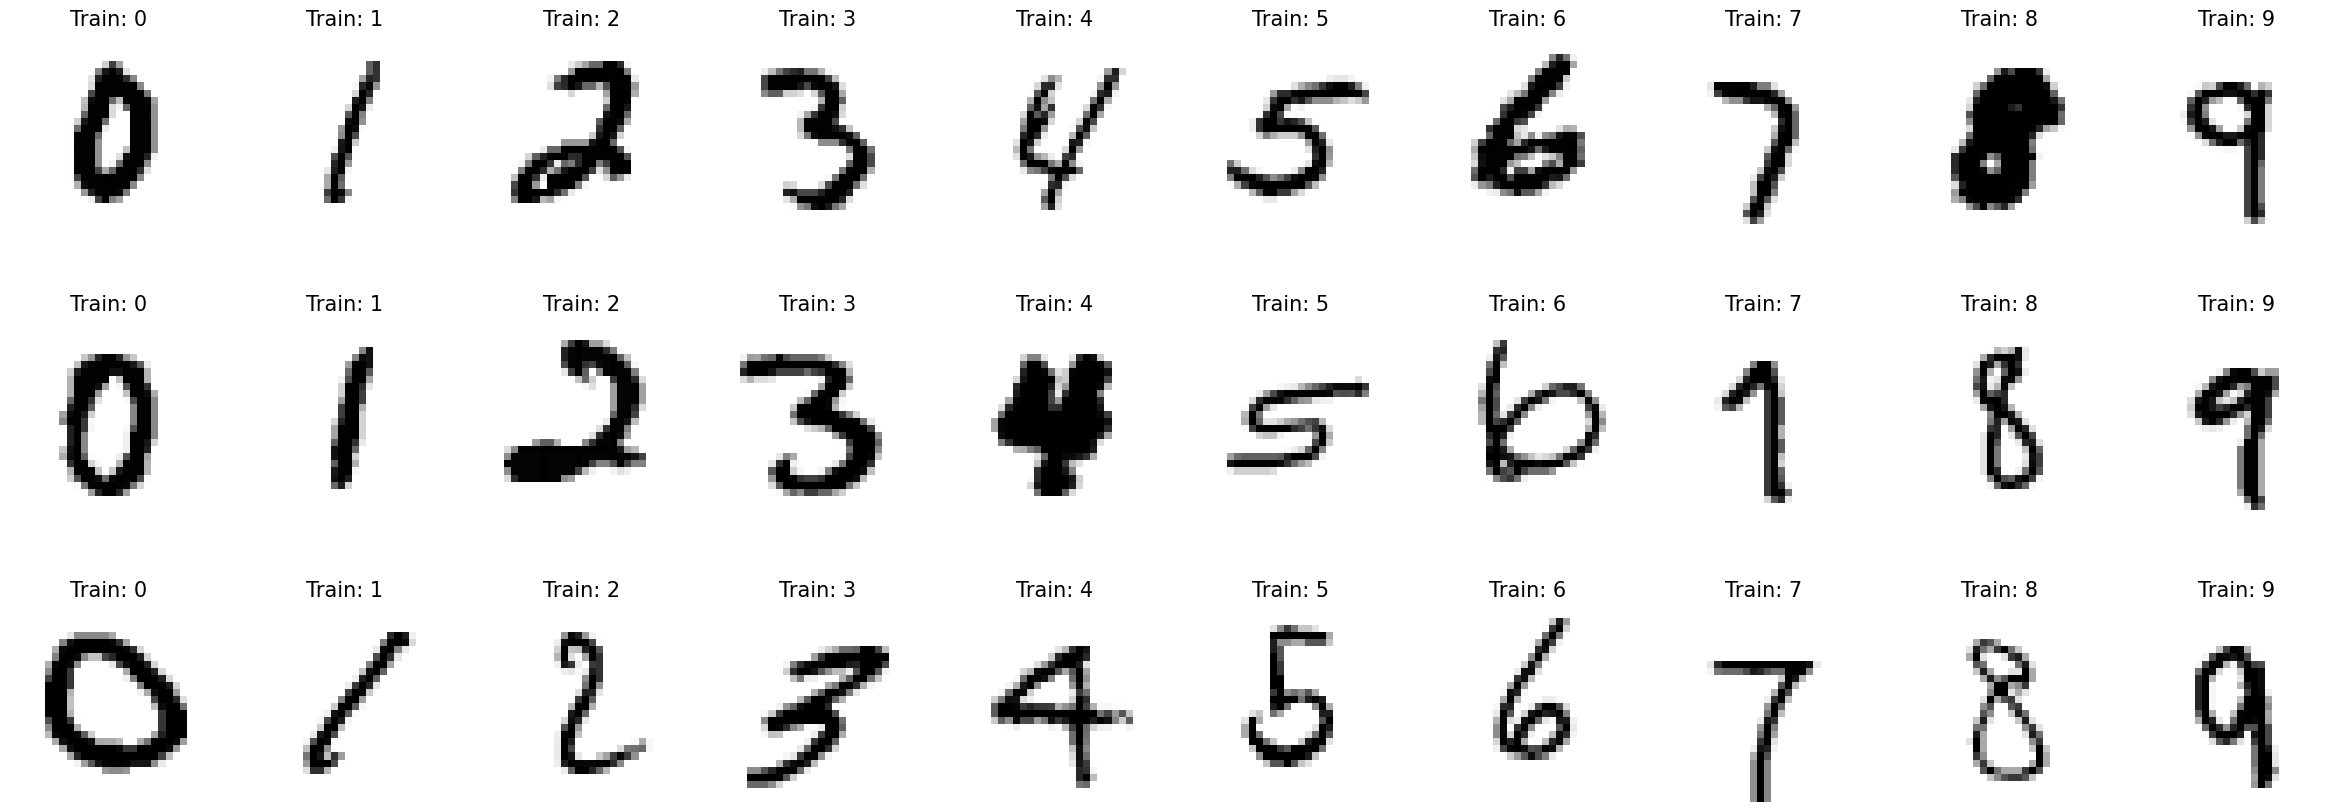

In [4]:
# --- Adjustable Parameters ---

display_num = 3

# -----------------------------

width = len(classes)
length = display_num
fig = plt.figure(figsize=(width*3, length*3.5))
for i in classes:
    images = X_train[y_train==i][:display_num]
    for j in range(display_num):
        ax = fig.add_subplot(length, width, j*width+i+1)
        ax.set_axis_off()
        image = images[j].reshape(28, 28)
        ax.imshow(image, cmap=plt.cm.gray_r)
        ax.set_title(f"Train: {i}", fontsize=15)

## Coding Samples
---
Let's train your own tree models to classify hand-written digits.
I will introduce the demos of Single Tree, Bagging Classifier, and Random Forest.

---

### Single Tree
---
Among hyper-parameters, I will focus on two hyper-parameters: `max_depth` and `min_samples_split`.

- Functions
    - `DecisionTreeClassifier`: Define Single Tree.
    

- Hyper-Parameters
    - `max_depth`: The maximum depth of the tree
    - `min_samples_split`: The minimum number of samples required to split an internal node
    
    
---

In [17]:
# --- Adjustable Parameters --- #

max_depth = 4
min_samples_split = 20

# ----------------------------- #
st = DecisionTreeClassifier(random_state=0,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth
                            )
st.fit(X_train, y_train)
print(f"Train Accuracy : {st.score(X_train, y_train)}")
print(f"Test  Accuracy : {st.score(X_test, y_test)}")

Train Accuracy : 0.5720833333333334
Test  Accuracy : 0.5966666666666667


---

### Logistic Regression
---

In [18]:
lr = LogisticRegression(random_state=0, max_iter=100)
lr.fit(X_train, y_train)
print(f"Train Accuracy : {lr.score(X_train, y_train)}")
print(f"Test  Accuracy : {lr.score(X_test, y_test)}")

Train Accuracy : 0.9966666666666667
Test  Accuracy : 0.9033333333333333


### Bagging Classifier
---
Multiple base classifiers are constructed through random sampling. Each base classifier utilizes all features, and the results are integrated through a voting method.

We have `n_estimators` to set the \# of classifiers (decision trees).

Note: We can use any classifier for Bagging Classifier (ex. SVC)

- Functions
    - `BaggingClassifier`: Define Bagging Classifier
    

- Hyper-Parameters
    - `n_estimators`: \# of classifiers
    
    
---

In [19]:
# --- Adjustable Parameters --- #

max_depth = 11
min_samples_split = 4
n_estimators = 20

# ----------------------------- #

dt = DecisionTreeClassifier(random_state=0,
                            min_samples_split=min_samples_split,
                            max_depth=max_depth)

bc = BaggingClassifier(base_estimator=dt,
                        n_estimators=n_estimators,
                        random_state=0,
                       )

bc.fit(X_train, y_train)
print(f"Train Accuracy : {bc.score(X_train, y_train)}")
print(f"Test  Accuracy : {bc.score(X_test, y_test)}")

Train Accuracy : 0.9970833333333333
Test  Accuracy : 0.8933333333333333


### Random Forest
---

Only using decision trees as base classifiers and randomly selecting feature subsets when constructing each tree can reduce overfitting more effectively than simple Bagging.


- Functions
    - `RandomForestClassifier`: Define Random Forest
    
---

In [20]:
# --- Adjustable Parameters --- #

max_depth = 12
min_samples_split = 4
n_estimators = 20

# ----------------------------- #

rf = RandomForestClassifier(random_state=0,
                             n_estimators=n_estimators,
                             min_samples_split=min_samples_split,
                             max_depth=max_depth,
                            )

rf.fit(X_train, y_train)
print(f"Train Accuracy : {rf.score(X_train, y_train)}")
print(f"Test  Accuracy : {rf.score(X_test, y_test)}")

Train Accuracy : 0.99875
Test  Accuracy : 0.9116666666666666


In [21]:
models = {}
models["single tree"] = st
models["bagging"] = bc
models["random forest"] = rf

## Feature Importance
---
One of other advantages of using tree-based models is its interpretability.
In other words, We can easily understand how the models process data.
Among them, I will introduce feature importance, which shows how each feature (in our case, pixels of images) affects the result.

- New Attributes
    - `feature_importances_`: feature importance of each feature
    
---
### Single Tree

---

In [10]:
model = models["single tree"]

fi = model.feature_importances_
fi_df = pd.DataFrame([np.array([f"pixel-({i//28}, {i%28})" for i in range(784)]), fi], index=["name", "importance"]).T
fi_df["importance"] = fi_df["importance"].values.astype("float")

fi_df.sort_values(by="importance", ascending=False)

,name,importance
455,"pixel-(16, 7)",0.152609
101,"pixel-(3, 17)",0.139647
433,"pixel-(15, 13)",0.136424
401,"pixel-(14, 9)",0.127442
319,"pixel-(11, 11)",0.096053
...,...,...
266,"pixel-(9, 14)",0.000000
267,"pixel-(9, 15)",0.000000
268,"pixel-(9, 16)",0.000000
270,"pixel-(9, 18)",0.000000


### Bagging Classifier

In [11]:
model = models["bagging"]

fi = np.zeros((784))
for tree in model.estimators_:
    fi += tree.feature_importances_
fi = fi/len(model.estimators_)
fi_df = pd.DataFrame([np.array([f"pixel-({i//28}, {i%28})" for i in range(784)]), fi], index=["name", "importance"]).T
fi_df["importance"] = fi_df["importance"].values.astype("float")

fi_df.sort_values(by="importance", ascending=False)

,name,importance
101,"pixel-(3, 17)",0.040258
211,"pixel-(7, 15)",0.037200
377,"pixel-(13, 13)",0.025648
568,"pixel-(20, 8)",0.023926
271,"pixel-(9, 19)",0.021689
...,...,...
280,"pixel-(10, 0)",0.000000
279,"pixel-(9, 27)",0.000000
278,"pixel-(9, 26)",0.000000
256,"pixel-(9, 4)",0.000000


### Random Forest

In [12]:
model = models["random forest"]

fi = model.feature_importances_
fi_df = pd.DataFrame([np.array([f"pixel-({i//28}, {i%28})" for i in range(784)]), fi], index=["name", "importance"]).T
fi_df["importance"] = fi_df["importance"].values.astype("float")

fi_df.sort_values(by="importance", ascending=False)

,name,importance
155,"pixel-(5, 15)",0.011752
350,"pixel-(12, 14)",0.011168
378,"pixel-(13, 14)",0.010836
318,"pixel-(11, 10)",0.010746
461,"pixel-(16, 13)",0.010127
...,...,...
279,"pixel-(9, 27)",0.000000
278,"pixel-(9, 26)",0.000000
255,"pixel-(9, 3)",0.000000
254,"pixel-(9, 2)",0.000000


### 2d Representation of Feature Importance
---

Of course, the feature name of MNIST is not intuitive, so let's visualize it in 2d-representation.

---

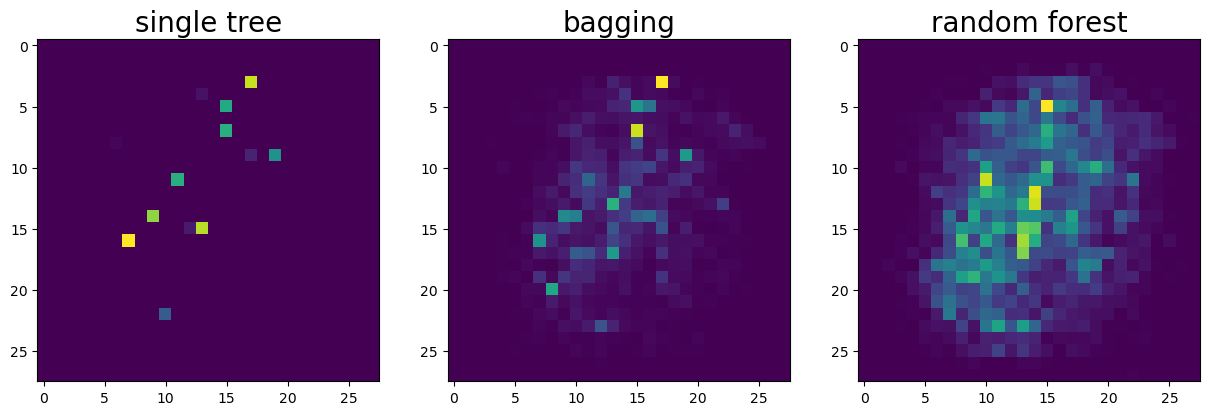

In [13]:
width = len(models)
length = 1

fig = plt.figure(figsize=(width*5, length*5.5))

for i, name in enumerate(models):
    if name in ["bagging"]:
        fi = np.zeros((784))
        for tree in models[name].estimators_:
            fi += tree.feature_importances_
        fi = fi/len(models[name].estimators_)
    else:
        fi = models[name].feature_importances_
    ax = fig.add_subplot(length, width, i+1)
    ax.imshow(fi.reshape(28, 28))
    ax.set_title(name, fontsize=20)

### Let's Observe the Validity of Feature Importance
---
Let's modify the values of the *un-important* features and the *important* features; and see the result.


---

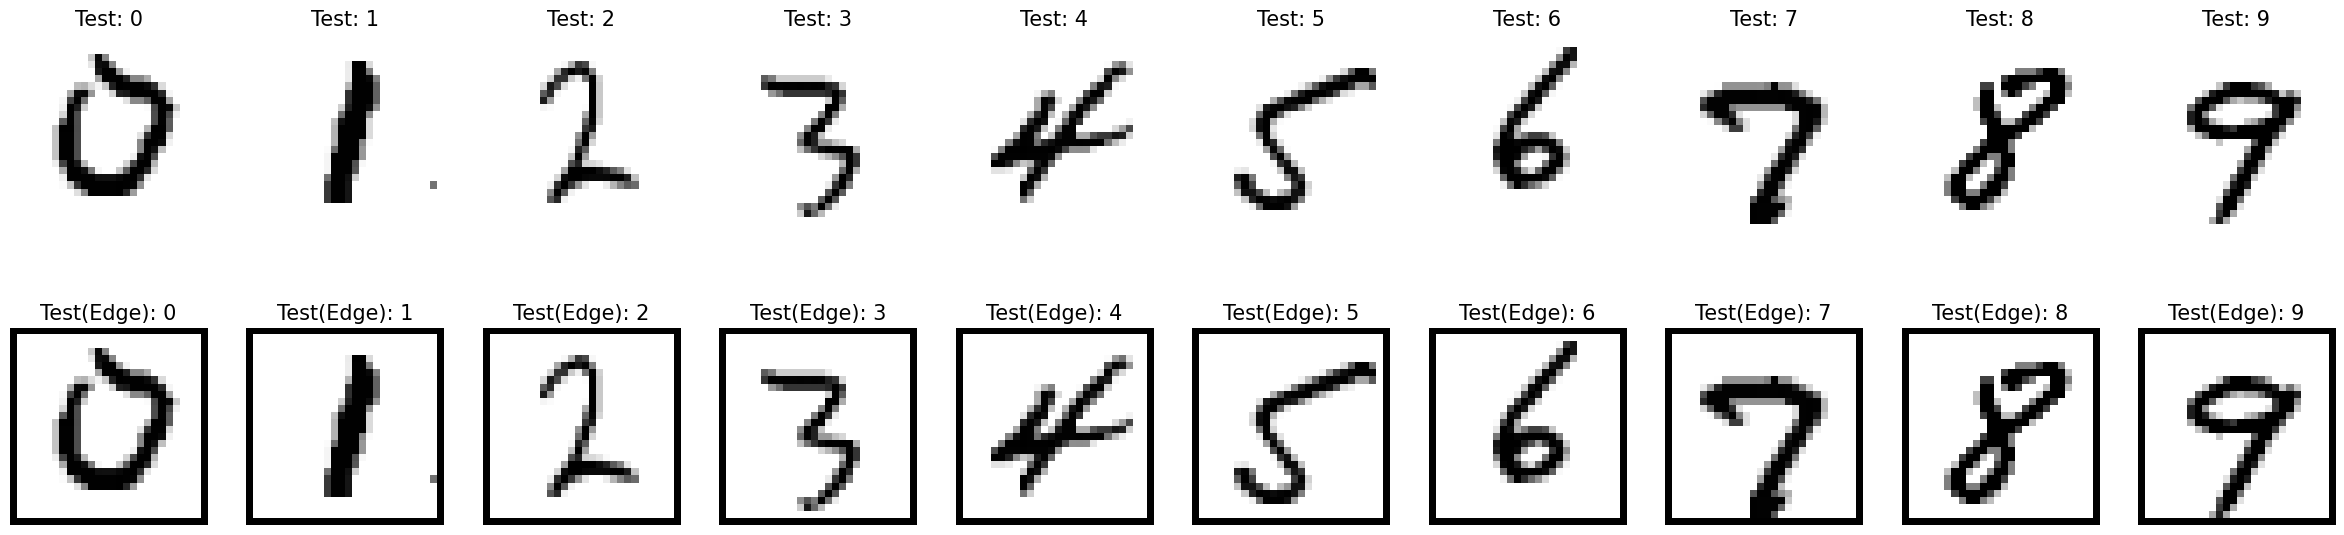

In [14]:
frame = np.zeros((28, 28))
frame[[0,-1],:] = 1
frame[:, [0,-1]] = 1
X_test_edge = X_test + frame.reshape(1, 784)
X_test_edge[X_test_edge>1] = 1

width = len(classes)
length = 2
fig = plt.figure(figsize=(width*3, length*3.5))
for i in classes:
    images = X_test[y_test==i][:1]
    ax = fig.add_subplot(length, width, i+1)
    ax.set_axis_off()
    image = images[0].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Test: {i}", fontsize=15)
    
    images = X_test_edge[y_test==i][:1]
    ax = fig.add_subplot(length, width, width+i+1)
    ax.set_axis_off()
    image = images[0].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Test(Edge): {i}", fontsize=15)

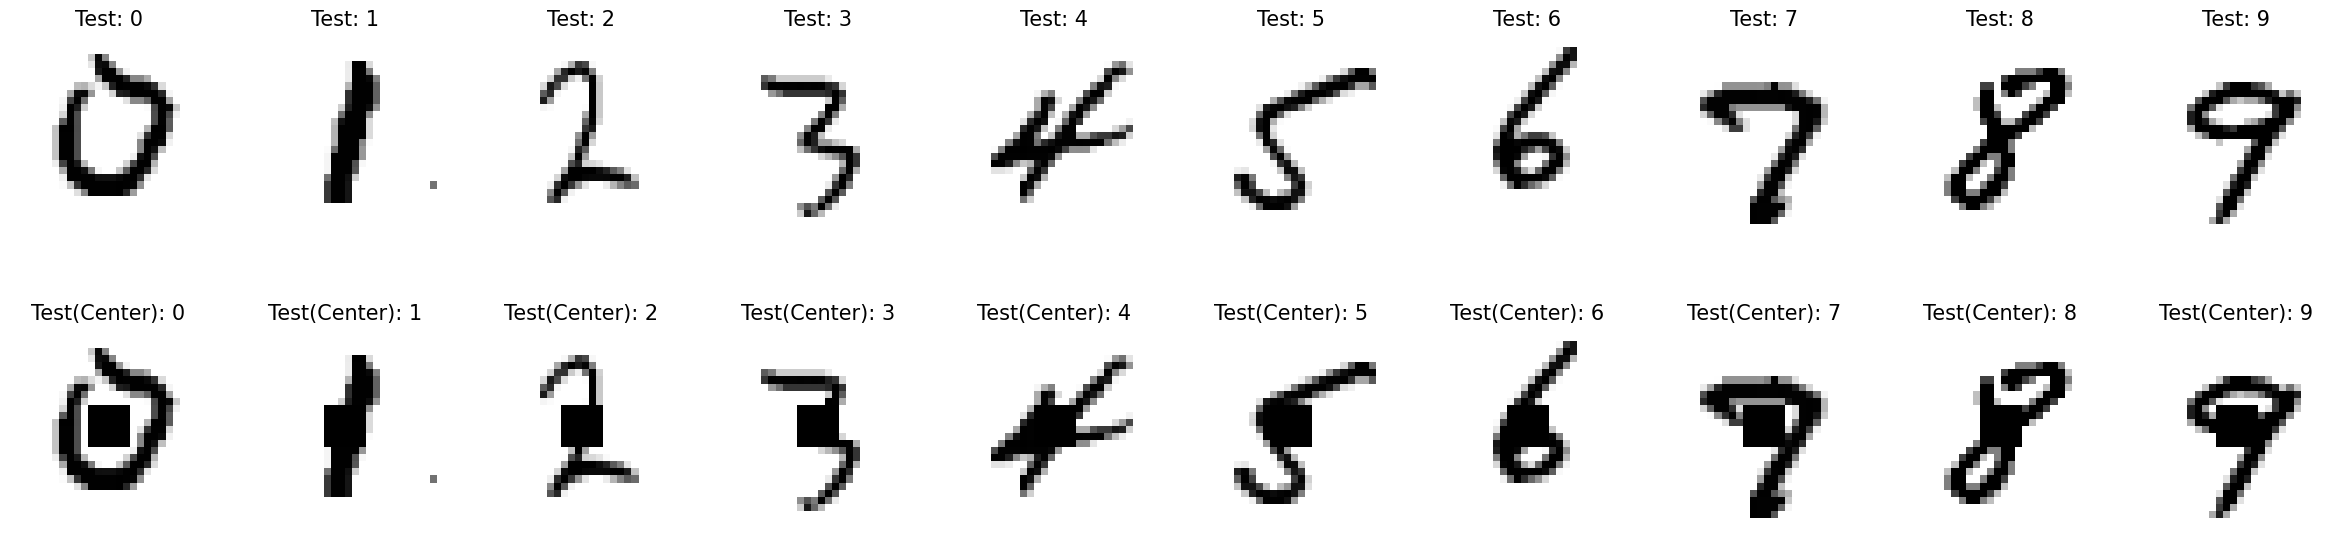

In [15]:
frame = np.zeros((28, 28))
frame = np.zeros((28, 28))
frame[11:17,11:17] = 1
X_test_center = X_test + frame.reshape(1, 784)
X_test_center[X_test_center>1] = 1

width = len(classes)
length = 2
fig = plt.figure(figsize=(width*3, length*3.5))
for i in classes:
    images = X_test[y_test==i][:1]
    ax = fig.add_subplot(length, width, i+1)
    ax.set_axis_off()
    image = images[0].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Test: {i}", fontsize=15)
    
    images = X_test_center[y_test==i][:1]
    ax = fig.add_subplot(length, width, width+i+1)
    ax.set_axis_off()
    image = images[0].reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Test(Center): {i}", fontsize=15)

In [16]:
for i, name in enumerate(models):
    print(f"Classifier: {name}")
    print(f"    Original Test Accuracy: {models[name].score(X_test, y_test)}")
    print(f"    Edge     Test Accuracy: {models[name].score(X_test_edge, y_test)}")
    print(f"    Center   Test Accuracy: {models[name].score(X_test_center, y_test)}")
    print()

Classifier: single tree
    Original Test Accuracy: 0.5966666666666667
    Edge     Test Accuracy: 0.5966666666666667
    Center   Test Accuracy: 0.31833333333333336

Classifier: bagging
    Original Test Accuracy: 0.8933333333333333
    Edge     Test Accuracy: 0.8933333333333333
    Center   Test Accuracy: 0.6516666666666666

Classifier: random forest
    Original Test Accuracy: 0.9116666666666666
    Edge     Test Accuracy: 0.9116666666666666
    Center   Test Accuracy: 0.7183333333333334

